In [25]:
using DifferentialEquations
using PyCall
# pygui(:qt)
using PyPlot
# pygui(true)
include("leap_frog_definitions.jl")
include("PSS_Definitions_Aref.jl")

PSS_function (generic function with 1 method)

In [26]:
H=.1
h=1/(2*H)
max_time=100
t_max=1e3
a=(2+h-2*sqrt(h+1))/h
Y=Yfind_Aref(1e-3,0,H);

In [27]:
p1=0
p2=0
q2=.1
q1=Q1_find_dimer(q2,p2,H)
println(q1)
Q1=(q1+q2)/sqrt(2)
Q2=(q1-q2)/sqrt(2)
P1=(p1+p2)/sqrt(2)
P2=(p1-p2)/sqrt(2);

Float64[]


MethodError: MethodError: no method matching +(::Array{Float64,1}, ::Float64)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:502
  +(!Matched::Bool, ::T<:AbstractFloat) where T<:AbstractFloat at bool.jl:112
  +(!Matched::Float64, ::Float64) at float.jl:395
  ...

In [15]:
u0=[Q1;P2;Q2;P1;0;0] # X P Q Y
Q0=[Q1,Q2]; P0=[P1,P2];
tspan = (0.0,max_time);

In [16]:
# Aref_Hamiltonian(Q0[2],P0[2],0)
Aref_Hamiltonian(Q0,P0,0)

0.09999999999999994

In [17]:
prob = ODEProblem(Eq_of_M_LAB_FRAME,u0,tspan)
t,A=solve(prob, RK4(),reltol=1e-6,abstol=1e-8,maxiters=1e15);

In [18]:
N=length(t.t)
Z=A[1,:]+im *A[2,:];
W=A[3,:]+im *A[4,:];
# Energy=zeros(N)
# for k=1:N
#     Energy[k]=abs(1/(1+Z[k]^2)-1/(1+W[k]^2))
# end

In [19]:
Q1=A[1,:]
Q2=A[3,:]
P1=A[4,:]
P2=A[2,:];

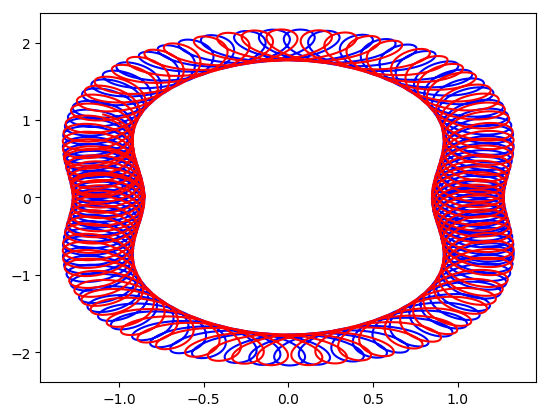

In [20]:
plot(Q1,P1,"b")
plot(Q2,P2,"r");

In [21]:
q1=(Q1+Q2)/sqrt(2)
q2=(Q1-Q2)/sqrt(2)
p1=(P1+P2)/sqrt(2)
p2=(P1-P2)/sqrt(2);

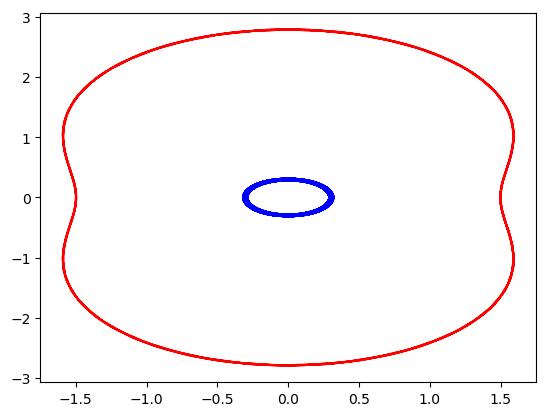

In [22]:
plot(q1,p1,"b")
plot(q2,p2,"r");

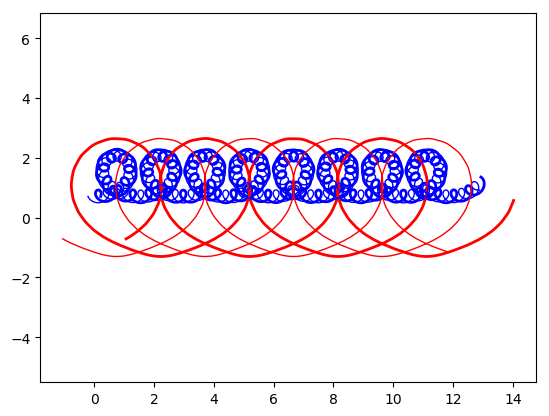

In [23]:
Centeroid=A[5,:]+im *A[6,:];

lin_impulse=im*(1+a )*ones(N);
z_1pos=.5*(Centeroid+Z+lin_impulse+W);
z_1neg=.5*(Centeroid+Z-lin_impulse-W);
z_2pos=.5*(Centeroid-Z+lin_impulse-W);
z_2neg=.5*(Centeroid-Z-lin_impulse+W);

z_1posX=real(z_1pos)
z_1posY=imag(z_1pos)

z_2posX=real(z_2pos)
z_2posY=imag(z_2pos)

z_1negX=real(z_1neg)
z_1negY=imag(z_1neg)

z_2negX=real(z_2neg)
z_2negY=imag(z_2neg)
plot(z_1posX,z_1posY,c="b",linewidth=2)
plot(z_1negX,z_1negY,c="r",linewidth=2)
plot(z_2posX,z_2posY,c="b",linewidth=1)
plot(z_2negX,z_2negY,c="r",linewidth=1)
axis("equal");

The Poincare' Surface of section for this orbit is 

In [13]:
N_iter_Q=10;#50
Q_start=-.3
Q_end=.3
N_iter_P=10
P_start=-.01
P_end=.01;

ArrP=range(P_start,stop=P_end,length=N_iter_P)
ArrQ=range(Q_start,stop=Q_end,length=N_iter_Q)

Brandons_Colors=["#393b79" ,"#5254a3","#6b6ecf","#9c9ede" ,"#637939","#8ca252" ,"#b5cf6b" ,"#cedb9c" ,"#8c6d31","#bd9e39" ,"#e7ba52","#e7cb94","#843c39","#ad494a" ,"#d6616b","#e7969c" ,"#7b4173" ,"#a55194","#ce6dbd" ,"#de9ed6"];

In [14]:
@time Q_PSS,P_PSS=PSS_function(Q0[2],P0[2], H,  t_max);

  6.904247 seconds (19.44 M allocations: 1.433 GiB, 19.92% gc time)


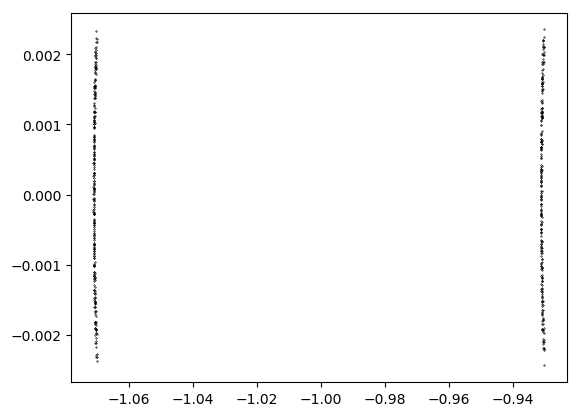

In [15]:
plot(P_PSS,Q_PSS,".", markersize=.5, c
    ="k");

In [16]:
# @time for k=1:N_iter_P
#     for j=1:N_iter_Q
#         Q_PSS,P_PSS,dH=PSS_function(ArrQ[j], ArrP[k], H, t_max)       
#         current_color=Brandons_Colors[mod(j,length(Brandons_Colors))+1]
#         if dH!=1
#             plot(P_PSS,Q_PSS,".", markersize=.1,c=current_color);
#         end
#     end
# end
# xlabel("P")
# ylabel("Q")
# xlim(-.01,.01) 
# ylim(-.3,.3) 